#### --- PHẦN 1: KHAI BÁO THƯ VIỆN ---

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

#### --- PHẦN 2: TẢI VÀ KHÁM PHÁ DỮ LIỆU CƠ BẢN ---

In [31]:
df = pd.read_csv("Insurance.csv")

print("Hiển thị 5 dòng đầu tiên:")
print(df.head())

print(f"\nKích thước của tập dữ liệu: {df.shape[0]} dòng và {df.shape[1]} cột.")

print("\nThông tin cấu trúc tập dữ liệu:")
df.info()

Hiển thị 5 dòng đầu tiên:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Kích thước của tập dữ liệu: 1338 dòng và 7 cột.

Thông tin cấu trúc tập dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usag

#### --- PHẦN 3: LÀM SẠCH DỮ LIỆU ---

In [32]:
# 3.1. Kiểm tra dữ liệu thiếu
print(f"Tổng số giá trị thiếu trong mỗi cột:\n{df.isnull().sum()}")

# 3.2. Kiểm tra dữ liệu trùng lặp
duplicate_rows = df.duplicated().sum()
print(f"\nSố dòng dữ liệu bị trùng lặp: {duplicate_rows}")

Tổng số giá trị thiếu trong mỗi cột:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Số dòng dữ liệu bị trùng lặp: 1


In [33]:
# Xử lý dữ liệu trùng lặp
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print(f"Đã xóa {duplicate_rows} dòng trùng lặp. Kích thước mới: {df.shape}")

Đã xóa 1 dòng trùng lặp. Kích thước mới: (1337, 7)


#### --- PHẦN 4: PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EDA) ---

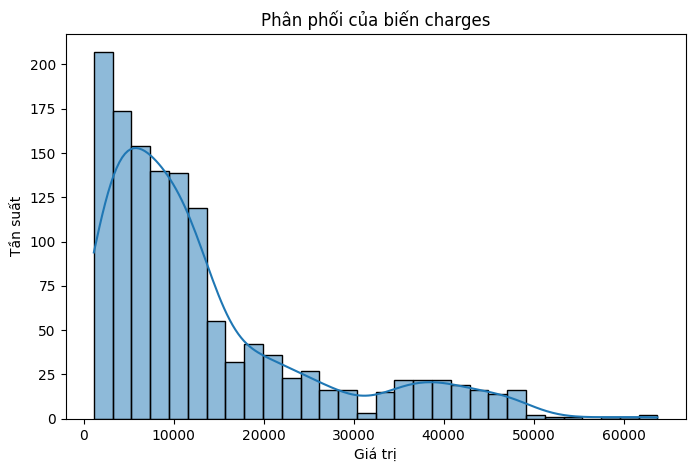

In [34]:
# 4.1. Phân tích biến mục tiêu 'charges'
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title("Phân phối của biến charges")
plt.xlabel("Giá trị")
plt.ylabel("Tần suất")
plt.show()

In [35]:
# Tìm giá trị lớn nhất trong cột 'charges'
max_charges = df['charges'].max()
# Tìm các hàng có giá trị 'charges' bằng giá trị lớn nhất
max_charges_rows = df[df['charges'] == max_charges]
print("Các hàng có giá trị charges lớn nhất:")
print(max_charges_rows)

Các hàng có giá trị charges lớn nhất:
     age     sex    bmi  children smoker     region      charges
543   54  female  47.41         0    yes  southeast  63770.42801


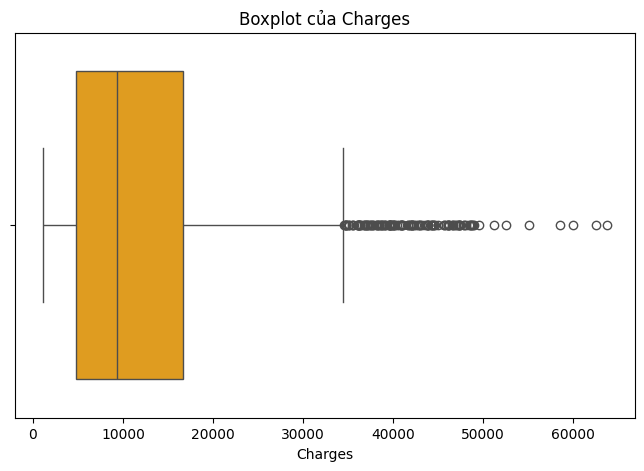

In [36]:
# Biểu đồ boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['charges'], color='orange')
plt.title('Boxplot của Charges')
plt.xlabel('Charges')
plt.show()

#### Nhận xét: 
Dữ liệu bị lệch phải (right-skewed). Áp dụng biến đổi log để chuẩn hóa.

In [37]:
#Chuẩn hóa Log
df_transformed = df.copy()
df_transformed['charges'] = np.log1p(df_transformed['charges'])  # log(charges + 1)

# Kiểm tra kết quả
print(df_transformed['charges'].describe())

count    1337.000000
mean        9.100097
std         0.918551
min         7.023647
25%         8.465341
50%         9.147098
75%         9.720689
max        11.063061
Name: charges, dtype: float64


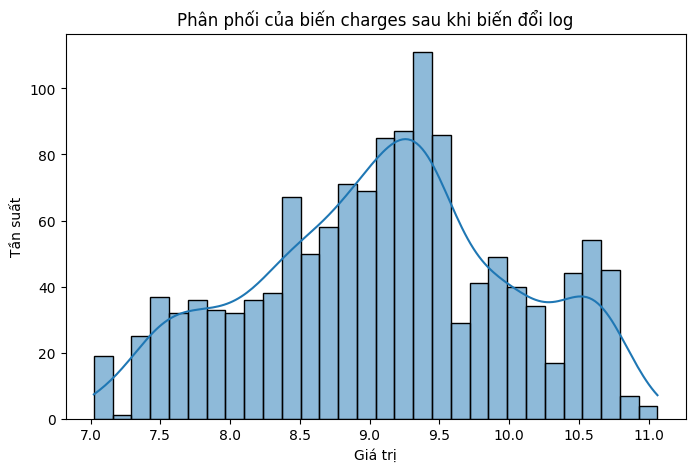

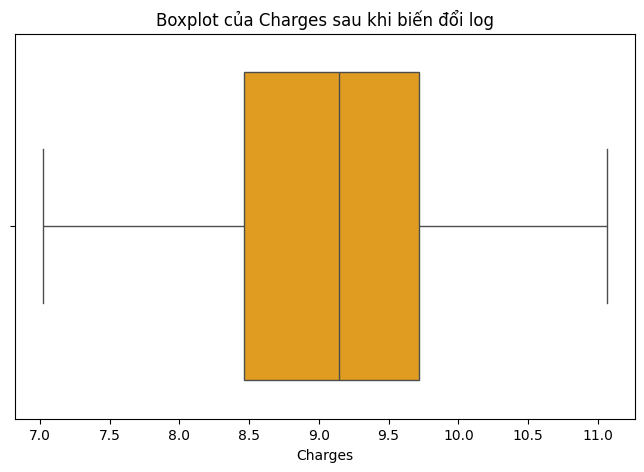

In [38]:
#Biểu đồ hist
plt.figure(figsize=(8, 5))
sns.histplot(df_transformed['charges'], bins=30, kde=True)
plt.title("Phân phối của biến charges sau khi biến đổi log")
plt.xlabel("Giá trị")
plt.ylabel("Tần suất")
plt.show()

# Biểu đồ boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_transformed['charges'], color='orange')
plt.title('Boxplot của Charges sau khi biến đổi log')
plt.xlabel('Charges')
plt.show()

C:\Users\ngomi\AppData\Local\Temp\ipykernel_21796\1366415904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='charges', data=df_transformed, palette='Set3')


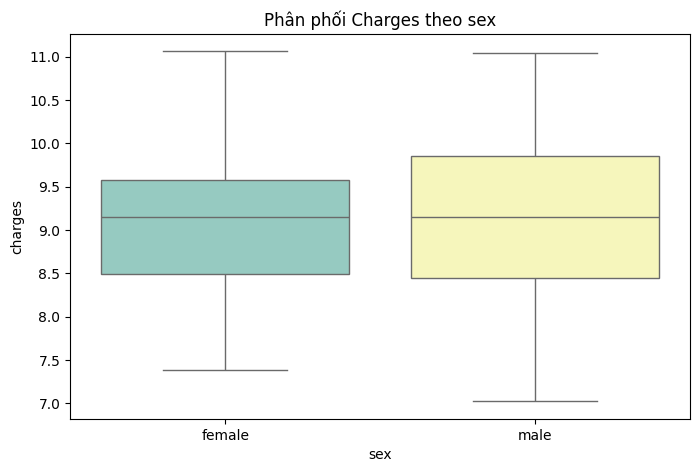

C:\Users\ngomi\AppData\Local\Temp\ipykernel_21796\1366415904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='charges', data=df_transformed, palette='Set3')


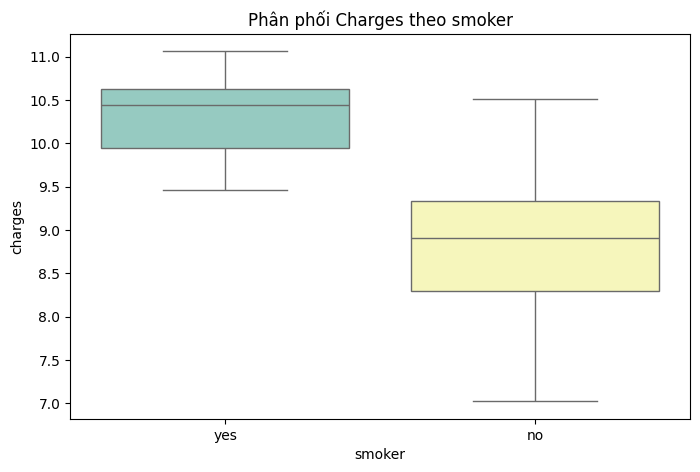

C:\Users\ngomi\AppData\Local\Temp\ipykernel_21796\1366415904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='charges', data=df_transformed, palette='Set3')


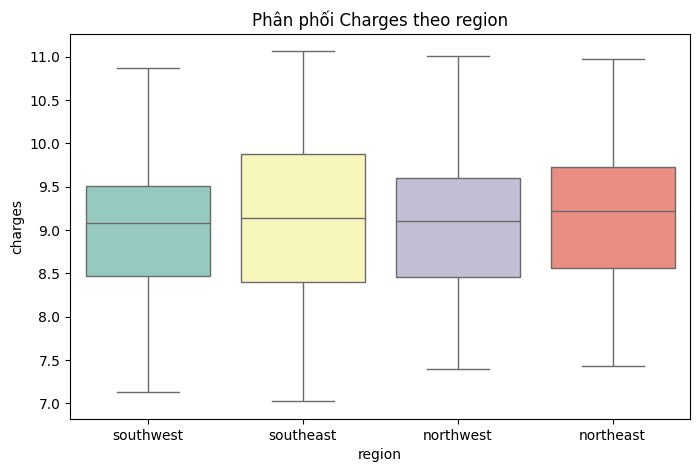

In [39]:
# 4.2. Phân tích mối quan hệ giữa các biến
# Tách các cột theo loại dữ liệu
categorical_features = df_transformed.select_dtypes(include=['object']).columns

# Mối quan hệ giữa biến phân loại và 'charges'
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=feature, y='charges', data=df_transformed, palette='Set3')
    plt.title(f'Phân phối Charges theo {feature}')
    plt.show()


Ma trận tương quan:
               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.526900
bmi       0.109344  1.000000  0.012755  0.132831
children  0.041536  0.012755  1.000000  0.160316
charges   0.526900  0.132831  0.160316  1.000000


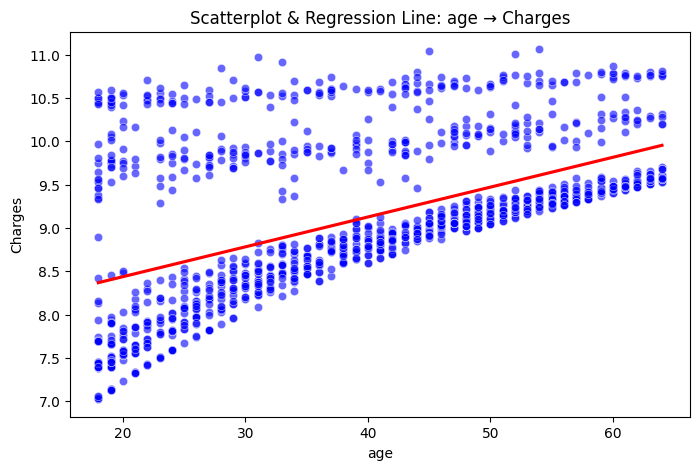

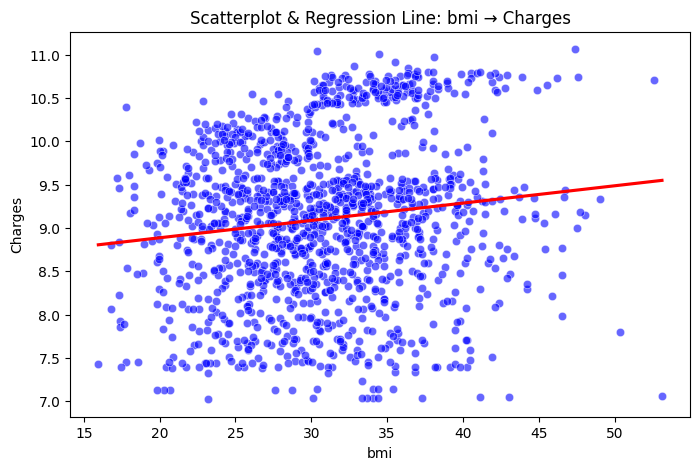

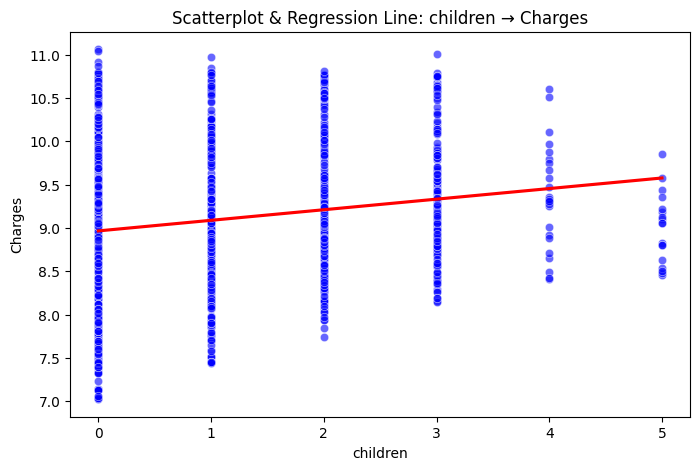

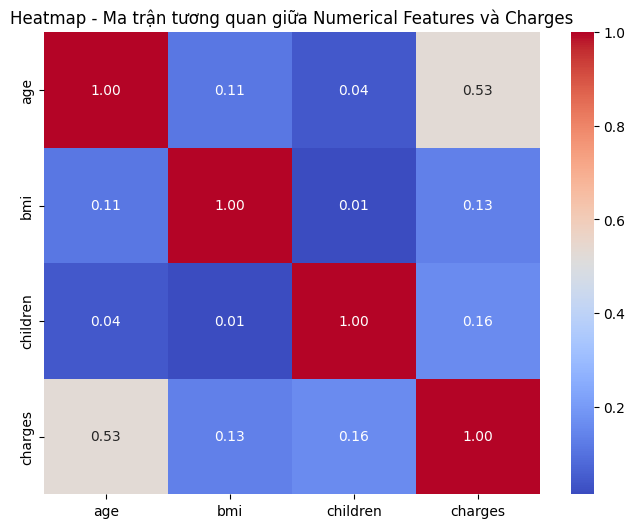

In [40]:
# Các biến số
numerical_features = ['age', 'bmi', 'children']
# Tính hệ số tương quan
correlation_matrix = df_transformed[numerical_features + ['charges']].corr()
print("Ma trận tương quan:")
print(correlation_matrix)

# Trực quan hóa mối quan hệ
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_transformed, x=feature, y='charges', color='blue', alpha=0.6)
    sns.regplot(data=df_transformed, x=feature, y='charges', scatter=False, color='red', ci=None)
    plt.title(f'Scatterplot & Regression Line: {feature} → Charges')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.show()
    
# Chọn các numerical features và cột charges
numerical_features = ['age', 'bmi', 'children', 'charges']

# Tính ma trận tương quan
correlation_matrix = df_transformed[numerical_features].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap - Ma trận tương quan giữa Numerical Features và Charges')
plt.show()


#### --- PHẦN 5: TIỀN XỬ LÝ VÀ CHIA DỮ LIỆU ---

In [41]:
# 5.1. Định nghĩa biến độc lập (X) và biến phụ thuộc (y)
X = df_transformed.drop('charges', axis=1)
y = df_transformed['charges']

In [42]:
# 5.2. Tạo pipeline tiền xử lý
# Cập nhật lại danh sách các biến sau khi đã xác định X
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 5.3. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)
print(f"Kích thước tập huấn luyện: {X_train.shape[0]} mẫu")
print(f"Kích thước tập kiểm tra: {X_test.shape[0]} mẫu")

Kích thước tập huấn luyện: 1069 mẫu
Kích thước tập kiểm tra: 268 mẫu


#### --- PHẦN 6: SO SÁNH CÁC MÔ HÌNH SỬ DỤNG CROSS-VALIDATION ---

In [43]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Random Forest': RandomForestRegressor(random_state=2025),
    'Gradient Boosting': GradientBoostingRegressor(random_state=2025),
    'XGBoost': XGBRegressor(random_state=2025, use_label_encoder=False, eval_metric='rmse')
}

results_cv = []

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    
    # Sử dụng 5-fold cross-validation để đánh giá
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    
    results_cv.append({'Model': name, 'Mean R2': scores.mean(), 'Std R2': scores.std()})
    print(f"Model: {name}, Mean R2 (CV=5): {scores.mean():.4f} (+/- {scores.std():.4f})")

results_df = pd.DataFrame(results_cv).sort_values(by='Mean R2', ascending=False)
print("\nBảng xếp hạng các mô hình dựa trên R2 Score trung bình:")
print(results_df)

Model: Linear Regression, Mean R2 (CV=5): 0.7689 (+/- 0.0437)
Model: Ridge, Mean R2 (CV=5): 0.7689 (+/- 0.0438)
Model: Random Forest, Mean R2 (CV=5): 0.8208 (+/- 0.0401)
Model: Gradient Boosting, Mean R2 (CV=5): 0.8343 (+/- 0.0358)


c:\Users\ngomi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ngomi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ngomi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Model: XGBoost, Mean R2 (CV=5): 0.7788 (+/- 0.0293)

Bảng xếp hạng các mô hình dựa trên R2 Score trung bình:
               Model   Mean R2    Std R2
3  Gradient Boosting  0.834281  0.035775
2      Random Forest  0.820799  0.040093
4            XGBoost  0.778807  0.029341
1              Ridge  0.768886  0.043778
0  Linear Regression  0.768881  0.043714


c:\Users\ngomi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ngomi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#### --- PHẦN 7: TINH CHỈNH SIÊU THAM SỐ CHO MÔ HÌNH TỐT NHẤT ---

In [44]:
# Giả sử Gradient Boosting là mô hình tốt nhất từ bước trên
best_model_name = results_df.iloc[0]['Model']
print(f"Chọn mô hình tốt nhất để tinh chỉnh: {best_model_name}")

Chọn mô hình tốt nhất để tinh chỉnh: Gradient Boosting


In [45]:
# Tạo pipeline cho mô hình tốt nhất
pipeline_best = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', GradientBoostingRegressor(random_state=2025))])

In [46]:
# Định nghĩa không gian tham số để tìm kiếm
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_split': [2, 4]
}

In [47]:
# Sử dụng GridSearchCV để tìm bộ tham số tối ưu
grid_search = GridSearchCV(pipeline_best, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"\nCác tham số tốt nhất tìm được: {grid_search.best_params_}")
print(f"R2 score tốt nhất trên tập validation (CV): {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Các tham số tốt nhất tìm được: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
R2 score tốt nhất trên tập validation (CV): 0.8398


#### --- PHẦN 8: ĐÁNH GIÁ MÔ HÌNH CUỐI CÙNG TRÊN TẬP TEST ---

In [ ]:
# 1. Lấy mô hình đã được tinh chỉnh tốt nhất
final_model = grid_search.best_estimator_

# 2. Dự đoán trên tập test. Kết quả vẫn ở thang đo log
y_pred_log = final_model.predict(X_test)

# 3. BIẾN ĐỔI NGƯỢC VỀ THANG ĐO GỐC (USD)
# y_test cũng đang ở thang đo log, cần biến đổi ngược nó để so sánh
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred_log)

# 4. TÍNH TOÁN CÁC ĐỘ ĐO
# R2 có thể được tính trên thang đo log để phản ánh hiệu suất tối ưu hóa của mô hình
r2_final = r2_score(y_test, y_pred_log) 

# RMSE và MAE PHẢI được tính trên thang đo gốc để có ý nghĩa thực tế
rmse_final_usd = root_mean_squared_error(y_test_orig, y_pred_orig)
mae_final_usd = mean_absolute_error(y_test_orig, y_pred_orig)

# 5. IN KẾT QUẢ CHÍNH XÁC
print(f"Kết quả trên tập Test của mô hình {best_model_name} đã tinh chỉnh:")
print(f"R-squared (R2, trên thang đo log): {r2_final:.4f}")
# Sử dụng f-string để định dạng tiền tệ cho dễ đọc
print(f"Root Mean Squared Error (RMSE, tính bằng USD): ${rmse_final_usd:,.2f}")
print(f"Mean Absolute Error (MAE, tính bằng USD): ${mae_final_usd:,.2f}")

Kết quả trên tập Test của mô hình Gradient Boosting đã tinh chỉnh:
R-squared (R2, trên thang đo log): 0.8067
Root Mean Squared Error (RMSE, tính bằng USD): $5,234.52
Mean Absolute Error (MAE, tính bằng USD): $2,495.66
